In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("credit_card_transactions.csv")

data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


# 3. Data Manupilation
## 3.1. Detecting and Removing Outliers
#### The only numerical value we can use for outlier detection is the transaction amount (amt). Other numerical values, such as population, latitude, longitude, etc., do not hold any meaningful statistical significance or distribution in this context.

#### I will consider data points above a certain amt value as outliers and remove them.

#### To examine the structure of the amt column and decide on a suitable threshold, I need to plot a scatterplot.

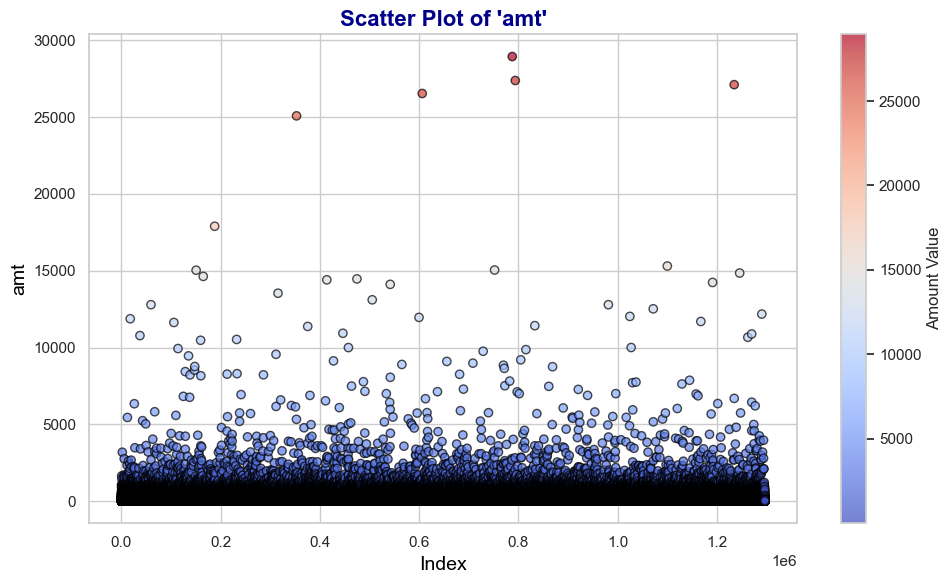

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plot using Seaborn
sns.set(style="whitegrid")

# Create the scatter plot with a gradient color and a better layout
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['amt'], c=data['amt'], cmap='coolwarm', edgecolors='black', alpha=0.7)

# Title and labels with better font size and color
plt.title("Scatter Plot of 'amt'", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Index', fontsize=14, color='black')
plt.ylabel('amt', fontsize=14, color='black')

# Adding a colorbar to indicate the scale of the 'amt' values
plt.colorbar(label='Amount Value')

# Show the plot
plt.tight_layout()
plt.show()


#### Upon visual inspection, it is possible to see that the data points start to disperse after values around 2500 to 4000.

#### Let's set the threshold at 3500 and visualize the results.

C:\Users\Krisha\AppData\Local\Temp\ipykernel_24136\3791661981.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Krisha\Desktop\Python_testing\cuda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


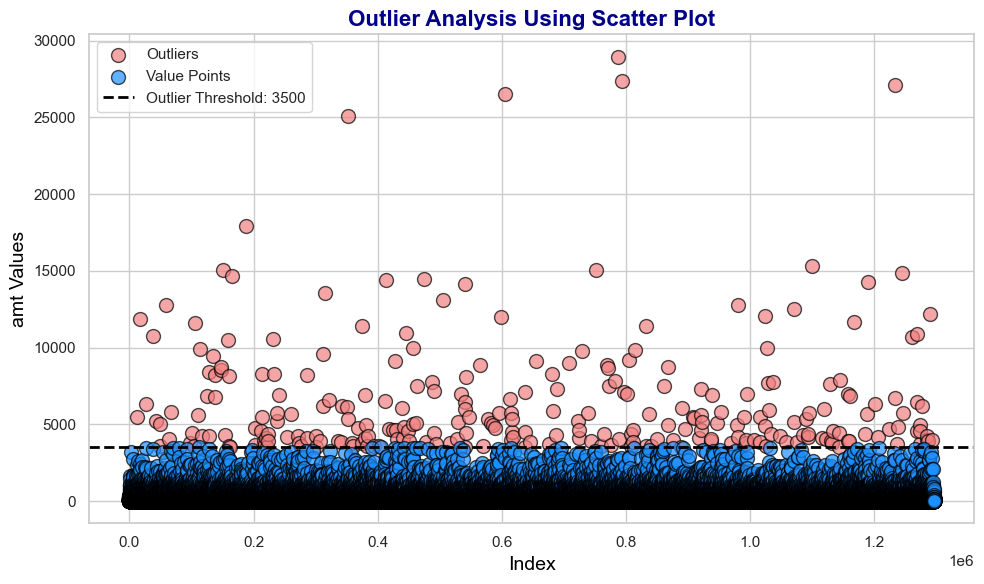

Number of outliers: 261
Outlier percentage: 0.02%


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a nice style for the plot using Seaborn
sns.set(style="whitegrid")

# Define outlier threshold
outlier_threshold = 3500
outliers = data['amt'] > outlier_threshold
outlier_count = np.count_nonzero(outliers)
total_count = len(data)
outlier_percentage = (outlier_count / total_count) * 100

# Create the scatter plot with nice color mapping and styling
plt.figure(figsize=(10, 6))

# Plot outliers with a distinct color and points for regular values
plt.scatter(data.index[outliers], data['amt'][outliers], c='lightcoral', edgecolors='black', alpha=0.7, label='Outliers', s=100)
plt.scatter(data.index[~outliers], data['amt'][~outliers], c='dodgerblue', edgecolors='black', alpha=0.7, label='Value Points', s=100)

# Add a horizontal line for the outlier threshold
plt.axhline(y=outlier_threshold, color='black', linestyle='--', label=f'Outlier Threshold: {outlier_threshold}', linewidth=2)

# Title and labels with better font size and color
plt.title('Outlier Analysis Using Scatter Plot', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Index', fontsize=14, color='black')
plt.ylabel('amt Values', fontsize=14, color='black')

# Show legend
plt.legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Print outlier statistics
print(f'Number of outliers: {outlier_count}')
print(f'Outlier percentage: {outlier_percentage:.2f}%')


### I am going to remove all records where the amt value is greater than 3500. Only  261 entries will be lost, resulting in a  0.0201% data loss. Given the dataset's size, this is not considered a significant loss of data.

In [7]:
data = data[~outliers]

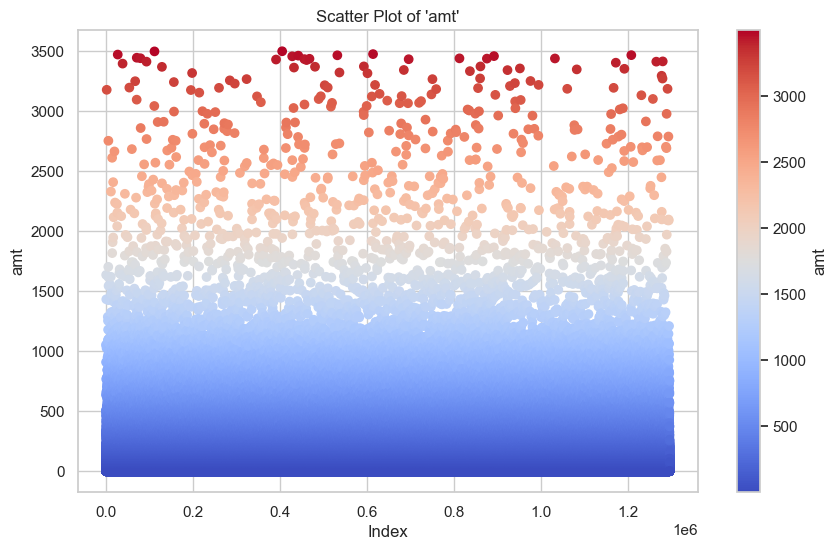

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(data.index, data['amt'], c=data['amt'], cmap='coolwarm')  # Apply coolwarm colormap
plt.title("Scatter Plot of 'amt'")  
plt.xlabel('Index')  
plt.ylabel('amt')  
plt.colorbar(label='amt')  # Add colorbar to indicate the scale
plt.show()


## 3.2. Dropping Unnecessary Features¶
### Let's remove the following columns, as they are not necessary for training our model.

### Unnamed: 0 - It's a unique number similar to an index, which is meaningless for training purposes.
### first - The cardholder's first and last names are irrelevant for training purposes.
### last - The cardholder's first and last names are irrelevant for training purposes.
### street - Since we already have lat and lon information, we don't need the data in these columns.
### city - Since we already have lat and lon information, we don't need the data in these columns.
### state - Since we already have lat and lon information, we don't need the data in these columns.
### zip - Since we already have lat and lon information, we don't need the data in these columns.
### trans_num - It's a unique number for each transaction, which is meaningless for training purposes.
### unix_time - We can get the same information from 'trans_date_trans_time' column.
### merch_zipcode - Since we already have lat and lon information, we don't need the data in these columns.


In [10]:
to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num','unix_time','merch_zipcode']
data = data.drop(columns=to_drop)

In [11]:
# size of our dataset.
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 1296414
Number of columns: 14


### 3.3. Feature Creation¶
We need to create the trans_year, trans_month, trans_day, trans_season, trans_weekday, trans_hour, trans_minute, 
#and trans_second columns using the trans_date_trans_time column. Afterwards, we can remove the trans_date_trans_time column.

In [13]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_season'] = data['trans_date_trans_time'].dt.month % 12 // 3 + 1  #1 = Winter, 2 = Spring, 3 = Summer, 4 = Autumn
data['trans_weekday'] = data['trans_date_trans_time'].dt.weekday 
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second

data = data.drop(columns=['trans_date_trans_time'])

### Now, let's calculate the cardholder's age at the time the transaction occurred.

In [15]:
data['dob'] = pd.to_datetime(data['dob'])
data['birth_year'] = data['dob'].dt.year
data['card_holder_age'] = data['trans_year'] - data['birth_year']
data = data.drop(columns=['dob', 'birth_year'])

### I will calculate the geographical distance between two points using their latitude and longitude coordinates using geopy library. 
#The geopy library simplifies calculating geographical distances between points with high precision by providing easy-to-use methods 
#that account for the Earth's curvature.

In [17]:
from geopy.distance import geodesic

def calculate_distance(row):
    point_a = (row['lat'], row['long'])
    point_b = (row['merch_lat'], row['merch_long'])
    return geodesic(point_a, point_b).kilometers 

data['distance'] = data.apply(calculate_distance, axis=1)

## Encoding¶
Using LabelEncoder to convert categorical features into numerical values for model training.

In [19]:
from sklearn.preprocessing import LabelEncoder


In [20]:
def encode_categorical_columns(data, columns):
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data

cat_features = ['cc_num', 'merchant', 'category', 'gender', 'job']
data = encode_categorical_columns(data, cat_features)
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,...,trans_year,trans_month,trans_day,trans_season,trans_weekday,trans_hour,trans_minute,trans_second,card_holder_age,distance
0,444,514,8,4.97,0,36.0788,-81.1781,3495,370,36.011293,...,2019,1,1,1,1,0,0,18,31,78.773821
1,42,241,4,107.23,0,48.8878,-118.2105,149,428,49.159047,...,2019,1,1,1,1,0,0,44,41,30.216618
2,237,390,0,220.11,1,42.1808,-112.2620,4154,307,43.150704,...,2019,1,1,1,1,0,0,51,57,108.102912
3,509,360,2,45.00,1,46.2306,-112.1138,1939,328,47.034331,...,2019,1,1,1,1,0,1,16,52,95.685115
4,368,297,9,41.96,1,38.4207,-79.4629,99,116,38.674999,...,2019,1,1,1,1,0,3,6,33,77.702395


## Over sampling using SMOTE and spliting dataset

#### Why SMOTE is Needed in Credit Card Fraud Detection?
Credit card fraud detection suffers from a severe class imbalance because fraudulent transactions make up only a tiny fraction of all transactions. This imbalance creates major issues for machine learning models:

##### ❌ Bias Towards Majority Class → Models tend to predict transactions as "legitimate" more often, ignoring fraud cases.
##### ❌ Poor Recall for Fraud Cases → The model fails to detect fraudulent transactions, which is unacceptable in real-world scenarios.
##### ❌ Misleading Accuracy → A model predicting 99% accuracy might be useless if it's just classifying everything as non-fraud.

To solve this, SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class instead of just duplicating existing ones. This helps the model learn patterns in fraudulent transactions without overfitting.

#### How SMOTE Works?
Identify Minority Class Instances (fraud cases).

Find k Nearest Neighbors for each fraud case.

Create Synthetic Samples by interpolating between real fraud cases and their neighbors.

Balance the dataset by adding these synthetic samples before training the model.

Types of SMOTE & When to Use Them
#### 1️⃣ Regular SMOTE (Basic SMOTE)
🔹 Best for: When fraud cases are well-separated but scarce.

🔹 How it works: Generates synthetic samples by interpolating between minority class neighbors.

🔹 Limitation: Can create unrealistic fraud cases in complex datasets
#### 2️⃣ Borderline-SMOTE
🔹 Best for: When fraud cases are near the decision boundary of the majority class.

🔹 How it works: Focuses on fraud cases close to non-fraud cases, ensuring synthetic samples help the model differentiate between the two classes.

🔹 Limitation: May still generate some noisy samples.
#### 3️⃣ SMOTE-ENN (SMOTE + Edited Nearest Neighbors)
🔹 Best for: When fraud cases are scattered and noisy.

🔹 How it works:

SMOTE adds synthetic fraud cases.

ENN (Edited Nearest Neighbors) removes noisy or ambiguous fraud samples.
🔹 Advantage: Improves precision by reducing false positives.

🔹 Limitation: Can remove some useful fraud cases.



In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#  (0 = Legitimate, 1 = Fraud)
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Before SMOTE:
 is_fraud
0    1031126
1       6005
Name: count, dtype: int64
After SMOTE:
 is_fraud
0    1031126
1     515563
Name: count, dtype: int64


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN

#  (0 = Legitimate, 1 = Fraud)
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Choose one SMOTE technique ===
# smote = BorderlineSMOTE(sampling_strategy=0.5, random_state=42)  # Best if fraud cases are close to normal cases
# smote = SMOTEENN(random_state=42)  # Best if there are noisy fraud cases in data
smote = ADASYN(sampling_strategy=0.5, random_state=42)  # Best if fraud cases are complex & scattered

# Apply selected SMOTE on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distributions before and after SMOTE
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Before SMOTE:
 is_fraud
0    1031126
1       6005
Name: count, dtype: int64
After SMOTE:
 is_fraud
0    1031126
1     515692
Name: count, dtype: int64


### Observations:
#### Before SMOTE:

Precision for fraud cases (1) is 0.97, recall is 0.73, and the F1-score is 0.83.

AUC-ROC score: 0.8647.

The model is precise but struggles to recall fraud cases.

#### After SMOTE:

Precision for fraud cases (1) dropped to 0.74, recall improved to 0.79, and the F1-score is 0.76.

AUC-ROC score increased to 0.8912.

Recall improved, meaning the model identifies more fraud cases at the cost of slightly lower precision.

#### Interpretation:
SMOTE helped increase recall, which is critical for fraud detection, as missing fraud is riskier than misclassifying legitimate transactions.

However, the slight drop in precision means more false positives.

AUC-ROC improved, showing the model’s better ability to distinguish fraud from non-fraud cases.



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train a baseline model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate performance
print("🔴 Baseline Model Performance (Without SMOTE)")
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))


🔴 Baseline Model Performance (Without SMOTE)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257782
           1       0.97      0.73      0.83      1501

    accuracy                           1.00    259283
   macro avg       0.99      0.86      0.92    259283
weighted avg       1.00      1.00      1.00    259283

AUC-ROC Score: 0.8647005797021338


In [27]:
# Train a model on SMOTE data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_smote = clf.predict(X_test)

# Evaluate performance
print("🟢 Model Performance (With SMOTE)")
print(classification_report(y_test, y_pred_smote))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_smote))


🟢 Model Performance (With SMOTE)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257782
           1       0.74      0.79      0.76      1501

    accuracy                           1.00    259283
   macro avg       0.87      0.89      0.88    259283
weighted avg       1.00      1.00      1.00    259283

AUC-ROC Score: 0.8919312912147682


### Feature Scaling (Very Important for ML Models!)
Some models (like Logistic Regression, SVM, and Neural Networks) perform poorly if features are not scaled properly.

Use StandardScaler for models like Logistic Regression, SVM, Neural Networks.

Use MinMaxScaler for models like KNN, Decision Trees (if needed).

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Use the same scaler on test data


#### 📌 Why Start with Baseline Models?
1️⃣ Performance Benchmarking → Baseline models help set a reference for improvement.
2️⃣ Interpretability → Simple models like Logistic Regression or Decision Trees help you understand feature importance before going complex.
3️⃣ Debugging & Feature Validation → If baseline models fail, it indicates issues in data preprocessing, feature selection, or class imbalance.
4️⃣ Avoid Overfitting → Complex models like Neural Networks may overfit if the dataset is small or noisy.

#### 📌 How to Use Baseline Models Before Advanced Ones?
✅ Step 1: Train a Simple Model (Logistic Regression, Decision Tree, or Random Forest)

✅ Step 2: Evaluate Its Performance (F1-score, Precision, Recall, AUC-ROC)

✅ Step 3: Compare with Advanced Models (XGBoost, LightGBM, Neural Networks)

✅ Step 4: If Advanced Model Doesn't Improve Much, Re-Evaluate Data Processing!

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# ----- LOGISTIC REGRESSION (WITH SMOTE) -----
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_smote = lr_smote.predict(X_test)
y_pred_smote_proba = lr_smote.predict_proba(X_test)[:, 1]

# Evaluation
print("\n🟢 Model Performance (With SMOTE)")
print(classification_report(y_test, y_pred_smote))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_smote_proba))


🟢 Model Performance (With SMOTE)
              precision    recall  f1-score   support

           0       1.00      0.95      0.98    257782
           1       0.08      0.69      0.14      1501

    accuracy                           0.95    259283
   macro avg       0.54      0.82      0.56    259283
weighted avg       0.99      0.95      0.97    259283

AUC-ROC Score: 0.8607184604919852


In [32]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# ✅ Initialize & Train XGBoost
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled == 1),  # Handle imbalance
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42
)

xgb_model.fit(X_train_resampled, y_train_resampled)

# ✅ Predict on test data
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# ✅ Evaluate Performance
print("🚀 Classification Report:\n", classification_report(y_test, y_pred))
print("🔥 AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))


C:\Users\Krisha\Desktop\Python_testing\cuda\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:28:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🚀 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    257782
           1       0.12      0.93      0.21      1501

    accuracy                           0.96    259283
   macro avg       0.56      0.94      0.59    259283
weighted avg       0.99      0.96      0.97    259283

🔥 AUC-ROC Score: 0.9845998101541582


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=259283/1501, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_xgb = grid_search.best_estimator_

# Predictions
y_pred = best_xgb.predict(X_test)
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
